In [4]:
import pandas as pd
df = pd.read_csv("Transport.csv.csv")
df.columns = df.columns.str.strip()
print("Column Names:")
print(df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())


Column Names:
['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

First 5 Rows:
         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30/08/2024        16436       10705           225        19026    3925   
1  15/09/2023        15499       10671           267        18421    4519   
2  28/12/2021         1756        2352             0         3775       0   
3  11/01/2023        10536        8347           223        14072       0   
4  11/09/2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0  


In [6]:

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date'])
df = df.sort_values('Date')
print("Date Range:", df['Date'].min(), "to", df['Date'].max())


Date Range: 2019-07-01 00:00:00 to 2024-09-29 00:00:00


In [7]:

print("Available columns:")
print(df.columns.tolist())


Available columns:
['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']


In [8]:
service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
daily_totals = df.groupby('Date')[service_columns].sum().reset_index()
daily_totals.head()


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School
0,2019-07-01,15987,9962,407,21223,3715
1,2019-07-02,16895,10656,409,21715,3993
2,2019-07-03,16613,10658,427,22025,3638
3,2019-07-04,16604,10445,437,21868,3576
4,2019-07-05,16040,10532,400,20697,2856


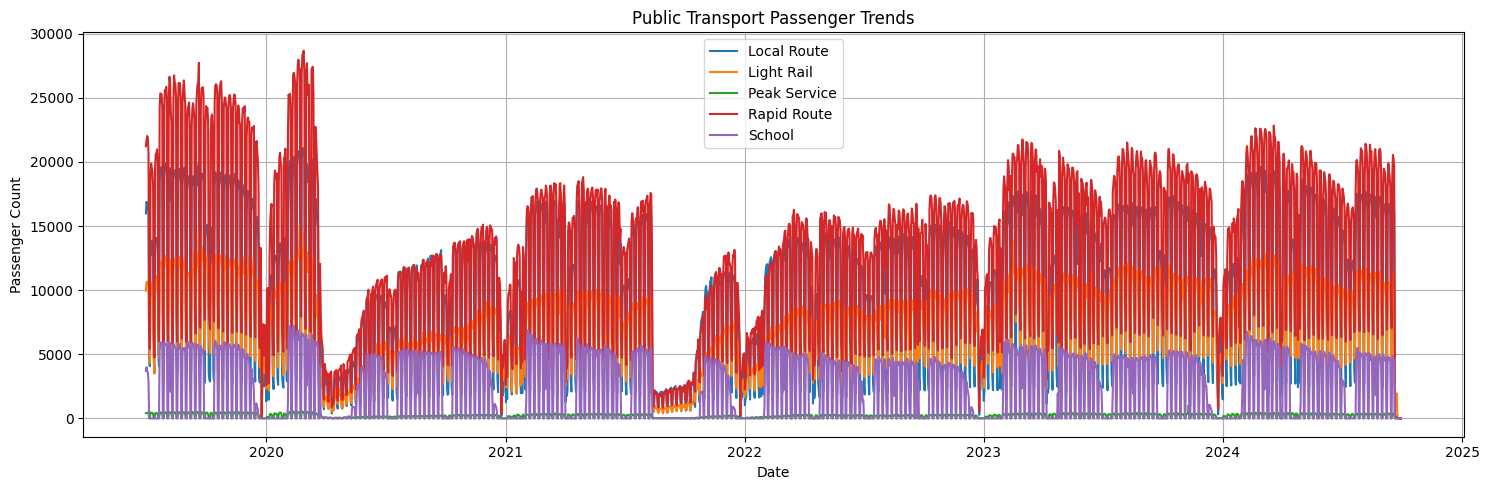

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for service in service_columns:
    plt.plot(daily_totals['Date'], daily_totals[service], label=service)
plt.title("Public Transport Passenger Trends")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Forecasting for: Local Route


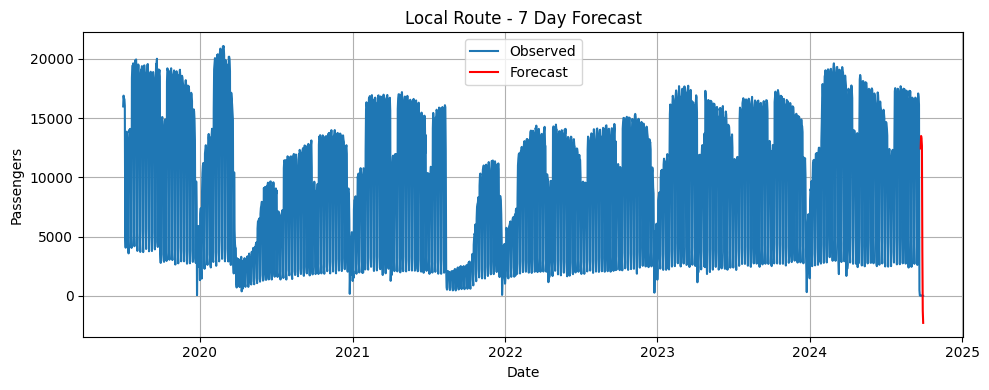

Local Route RMSE: 9944.26

Forecasting for: Light Rail


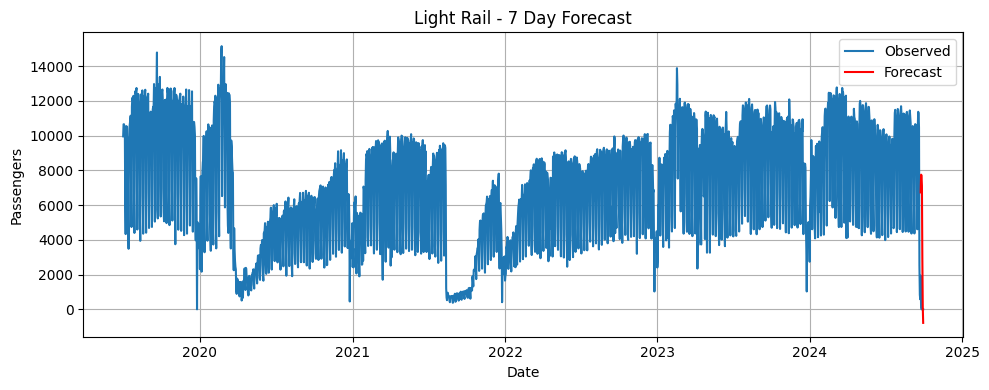

Light Rail RMSE: 5359.76

Forecasting for: Peak Service


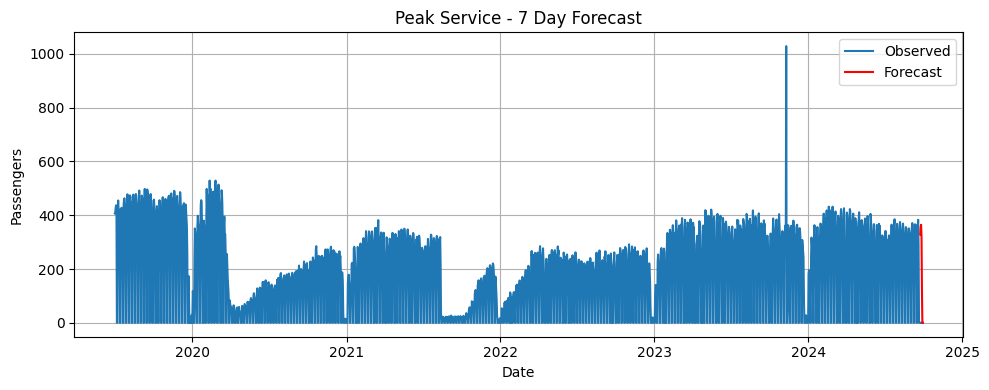

Peak Service RMSE: 263.42

Forecasting for: Rapid Route


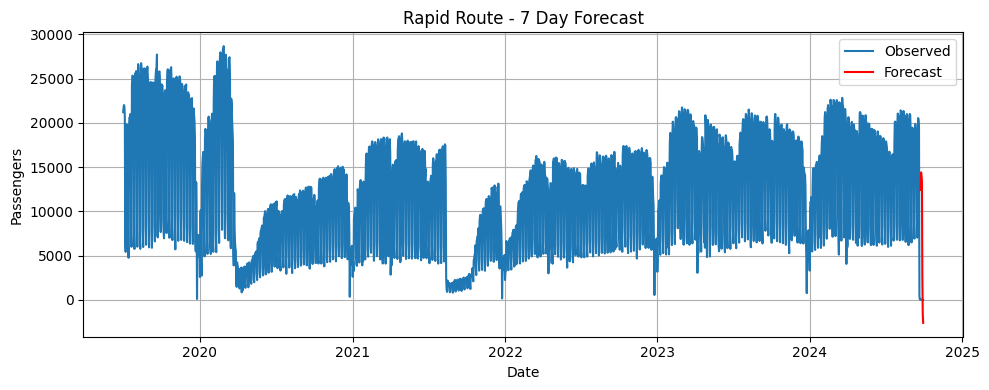

Rapid Route RMSE: 10374.54

Forecasting for: School


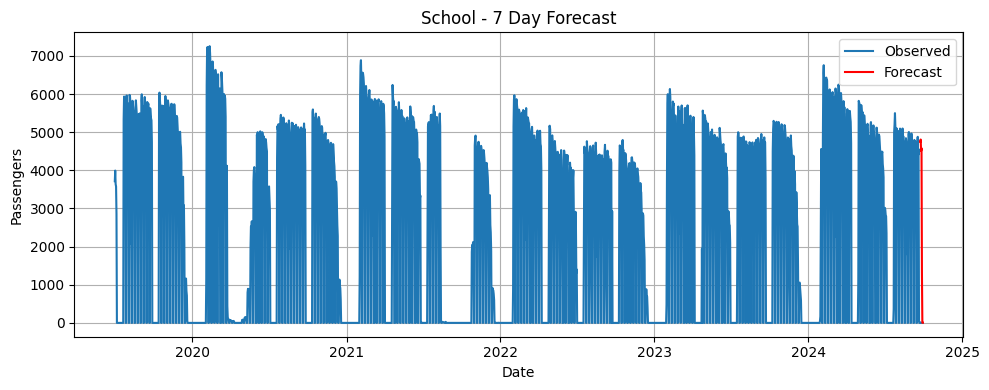

School RMSE: 3554.48


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

forecast_horizon = 7
forecast_results = {}

for service in service_columns:
    print(f"\nForecasting for: {service}")

    ts = daily_totals.set_index('Date')[service].asfreq('D').ffill()


    train = ts[:-forecast_horizon]
    test = ts[-forecast_horizon:]


    model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,0,7))
    results = model.fit(disp=False)


    forecast = results.forecast(steps=forecast_horizon)
    forecast_results[service] = forecast


    plt.figure(figsize=(10, 4))
    plt.plot(ts.index, ts, label="Observed")
    plt.plot(forecast.index, forecast, label="Forecast", color="red")
    plt.title(f"{service} - 7 Day Forecast")
    plt.xlabel("Date")
    plt.ylabel("Passengers")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    mse = mean_squared_error(test, forecast)
    rmse = mse ** 0.5
    print(f"{service} RMSE: {rmse:.2f}")


In [12]:

import pandas as pd

forecast_df = pd.DataFrame(forecast_results)
forecast_df.index.name = 'Date'
forecast_df.reset_index(inplace=True)

print("7-Day Forecast:")
print(forecast_df)


7-Day Forecast:
        Date   Local Route   Light Rail  Peak Service   Rapid Route  \
0 2024-09-23  12439.148722  6733.009160    328.685990  12426.270090   
1 2024-09-24  13491.935918  7755.430626    356.201360  14413.909878   
2 2024-09-25  13293.164572  7705.933631    364.606474  13991.241495   
3 2024-09-26  12666.730662  7107.535524    321.614463  13483.215909   
4 2024-09-27   3832.129446  2936.539430    123.098847   2621.276408   
5 2024-09-28  -1263.812159   144.871191     -0.333710  -1629.684433   
6 2024-09-29  -2280.799612  -781.885165     -0.334129  -2598.240868   

        School  
0  4748.040123  
1  4807.095951  
2  4505.776514  
3  4580.373029  
4  1311.691004  
5     3.207761  
6     3.292500  
